### 2.4.3 Solving Differential Equations
You can use Sage to investigate ordinary differential equations. To solve the equation $x' + x - 1 = 0$:

In [18]:
t = var('t') # define a variable t
x = function('x')(t) # define x to be a function of that variable
DE = diff(x, t) + x - 1
desolve(DE, [x, t])

(_C + e^t)*e^(-t)

In [19]:
from sage.all import *
t = var('t') # define a variable t
x = function('x')(t) # define x to be a function of that variable
DE = diff(x, t) + x - Integer(1)
desolve(DE, [x, t])

(_C + e^t)*e^(-t)


This uses Sage’s interface to Maxima [Max], and so its output may be a bit different from other Sage output. In this case, this says that the general solution to the differential equation is $x(t) = e^{-t}(e^{t} + c)$.

You can compute Laplace transforms also; the Laplace transform of $t^2e^{t} - \sin(t)$ is computed as follows:

In [20]:
s = var("s")
t = var("t")
f = t^2 * exp(t) - sin(t)
f.laplace(t, s)

-1/(s^2 + 1) + 2/(s - 1)^3

In [21]:
from sage.all import *
s = var("s")
t = var("t")
f = t**Integer(2) * exp(t) - sin(t)
f.laplace(t, s)

-1/(s^2 + 1) + 2/(s - 1)^3

### Example: Solving Differential Equations for a Coupled Spring System

Here is a more involved example. The displacement from equilibrium for a coupled spring attached to a wall on the left

|\-\-\-\-\-\-\\/\\/\\/\\/\\\-\-\-\-\-\-|mass1|\-\-\-\-\-\-\\/\\/\\/\\/\\/\-\-\-\-\-\-\-\-|mass2|

.        spring1                            spring2


is modeled by the system of 2nd order differential equations

$$
m_1x''_1 + (k_1 + k_2)x_1 - k_2x_2 = 0
$$

$$
m_2x''_2 + k_2(x_2 - x_1) = 0,
$$

where $m_i$ is the mass of object i, $x_i$ is the displacement from equilibrium of mass i, and $k_i$ is the spring constant for spring i.

**Example**: Use SageMath to solve the above problem with $m_1 = 2$, $m_2 = 1$, $k_1 = 4$, $k_2 = 2$, $x_1(0) = 3$, $x'_1(0) = 0$, $x_2(0) = 3$, $x'_2(0) = 0$.

**Solution**: Take the Laplace transform of the first equation (with the notation $x = x_1, y = x_2$):



In [22]:
t, s = SR.var('t, s')
x = function('x')
y = function('y')
f = 2*x(t).diff(t,2) + 6*x(t) - 2*y(t)
f.laplace(t,s)

2*s^2*laplace(x(t), t, s) - 2*s*x(0) + 6*laplace(x(t), t, s) - 2*laplace(y(t), t, s) - 2*D[0](x)(0)


This returns:

In [23]:
2*s^2*laplace(x(t), t, s) - 2*s*x(0) + 6*laplace(x(t), t, s) - 2*laplace(y(t), t, s) - 2*D[0](x)(0)

2*s^2*laplace(x(t), t, s) - 2*s*x(0) + 6*laplace(x(t), t, s) - 2*laplace(y(t), t, s) - 2*D[0](x)(0)


This is hard to read, but it says that

$$
-2x'(0) + 2s^2 \cdot X(s) - 2sx(0) - 2Y(s) + 6X(s) = 0
$$

(where the Laplace transform of a lower case function like $x(t)$ is the upper case function $X(s)$).

Take the Laplace transform of the second equation:

In [24]:
de2 = maxima("diff(y(t),t, 2) + 2*y(t) - 2*x(t)")
lde2 = de2.laplace("t","s"); lde2.sage()

s^2*laplace(y(t), t, s) - s*y(0) - 2*laplace(x(t), t, s) + 2*laplace(y(t), t, s) - D[0](y)(0)

This says

$$-Y'(0) + s^2Y(s) + 2Y(s) - 2X(s) - sy(0) = 0.$$

Plug in the initial conditions for $x(0)$ , $x'(0)$ , $y(0)$ , and  $y'(0)$,  and solve the resulting two equations:


In [25]:
var('s X Y')
eqns = [(2*s^2+6)*X-2*Y == 6*s, -2*X +(s^2+2)*Y == 3*s]
solve(eqns, X, Y)

[[X == 3*(s^3 + 3*s)/(s^4 + 5*s^2 + 4), Y == 3*(s^3 + 5*s)/(s^4 + 5*s^2 + 4)]]

In [26]:
from sage.all import *
var('s X Y')
eqns = [(Integer(2)*s**Integer(2)+Integer(6))*X-Integer(2)*Y == Integer(6)*s,
        -Integer(2)*X +(s**Integer(2)+Integer(2))*Y == Integer(3)*s]
solve(eqns, X, Y)

[[X == 3*(s^3 + 3*s)/(s^4 + 5*s^2 + 4), Y == 3*(s^3 + 5*s)/(s^4 + 5*s^2 + 4)]]


Now take inverse Laplace transforms to get the answer:

In [27]:
var('s t')
inverse_laplace((3*s^3 + 9*s)/(s^4 + 5*s^2 + 4), s, t)
inverse_laplace((3*s^3 + 15*s)/(s^4 + 5*s^2 + 4), s, t)

-cos(2*t) + 4*cos(t)

In [28]:
from sage.all import *
var('s t')
inverse_laplace((Integer(3)*s**Integer(3) + Integer(9)*s)/(s**Integer(4) + Integer(5)*s**Integer(2) + Integer(4)), s, t)
inverse_laplace((Integer(3)*s**Integer(3) + Integer(15)*s)/(s**Integer(4) + Integer(5)*s**Integer(2) + Integer(4)), s, t)

-cos(2*t) + 4*cos(t)


Therefore, the solution is

$$ x_1(t) = \cos(2t) + 2 \cos(t), \quad x_2(t) = 4 \cos(t) - \cos(2t). $$

This can be plotted parametrically using:

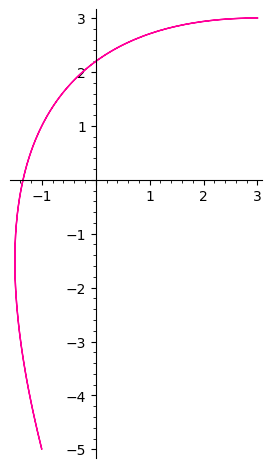

In [29]:
t = var('t')
P = parametric_plot((cos(2*t) + 2*cos(t), 4*cos(t) - cos(2*t) ), (t, 0, 2*pi), rgbcolor=hue(0.9))
show(P)

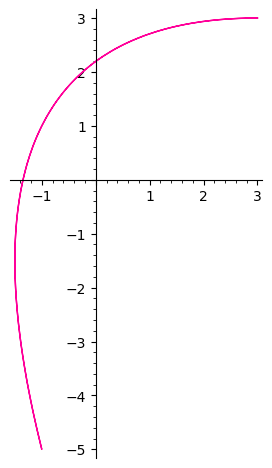

In [30]:
from sage.all import *
t = var('t')
P = parametric_plot((cos(Integer(2)*t) + Integer(2)*cos(t), Integer(4)*cos(t) - cos(Integer(2)*t) ),
                    (t, Integer(0), Integer(2)*pi), rgbcolor=hue(RealNumber(0.9)))
show(P)

The individual components can be plotted using:

$$ t = \text{var}(t) $$

$$ p_1 = \text{plot}(\cos(2t) + 2\cos(t), (t, 0, 2\pi), \text{rgbcolor}=\text{hue}(0.3)) $$

$$ p_2 = \text{plot}(4\cos(t) - \cos(2t), (t, 0, 2\pi), \text{rgbcolor}=\text{hue}(0.6)) $$

$$ \text{show}(p_1 + p_2) $$

For more on plotting, see Plotting. See section 5.5 of [NagleEtAl2004] for further information on differential equations.



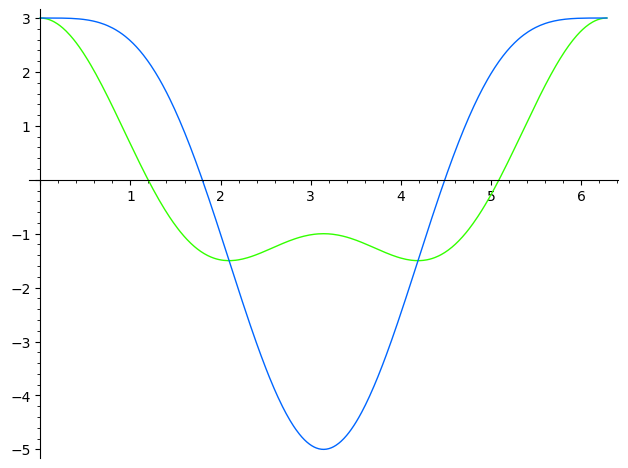

In [31]:
t = var('t')
p1 = plot(cos(2*t) + 2*cos(t), (t, 0, 2*pi), rgbcolor=hue(0.3))
p2 = plot(4*cos(t) - cos(2*t), (t, 0, 2*pi), rgbcolor=hue(0.6))
show(p1 + p2)